Implementation of Exercise 3.27 of book Foundations of Data Science

# Import Libraries

In [1]:
from matplotlib import pyplot as plt
from PIL import Image

import numpy as np

%matplotlib inline

# Declare variables

In [2]:
photo_path = "../datasets/lena_400x400.jpg"

# Preprocessing

## Load photo

In [3]:
photo_file = Image.open(photo_path)

## Get shape

In [4]:
width, height = photo_file.size

## Convert each channel to numpy matrix

In [5]:
r, g, b = np.dsplit(np.asarray(photo_file), 3)
r = r.reshape(height, width)
g = g.reshape(height, width)
b = b.reshape(height, width)

# Run SVD

In [6]:
%time U_r, s_r, V_r = np.linalg.svd(r)
%time U_g, s_g, V_g = np.linalg.svd(g)
%time U_b, s_b, V_b = np.linalg.svd(b)

CPU times: user 112 ms, sys: 4 ms, total: 116 ms
Wall time: 60.7 ms
CPU times: user 96 ms, sys: 4 ms, total: 100 ms
Wall time: 48.6 ms
CPU times: user 100 ms, sys: 0 ns, total: 100 ms
Wall time: 49.2 ms


# Results

### Methods

In [7]:
def reconstruct_matrix(U, s, V, perc):
    k = int(perc * len(s))
    S = np.diag(s[:k])
    return np.dot(U[:,:k], np.dot(S, V[:k,:]))

In [8]:
def reconstruct_photo(U_r, s_r, V_r,
                      U_g, s_g, V_g,
                      U_b, s_b, V_b,
                      perc):
    r = reconstruct_matrix(U_r, s_r, V_r, perc)
    g = reconstruct_matrix(U_g, s_g, V_g, perc)
    b = reconstruct_matrix(U_b, s_b, V_b, perc)  
    return Image.fromarray(np.dstack((r,g,b)).astype('uint8'))

### Experiments

#### Original

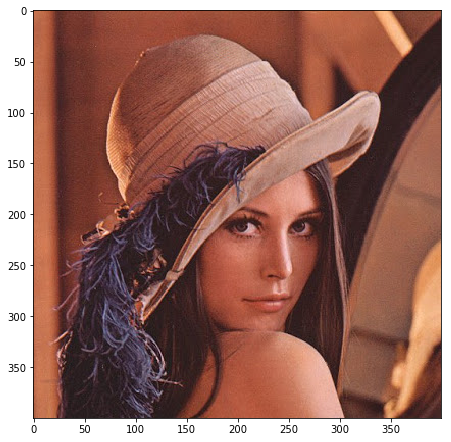

In [9]:
plt.figure(figsize = (7.5,7.5))
plt.imshow(np.asarray(photo_file))

#### Compressed

In [10]:
# Percentage of single-values to be kept
percs = [0.005, 0.01, 0.025, 0.05, 0.10, 0.25, 0.50, 1.0]

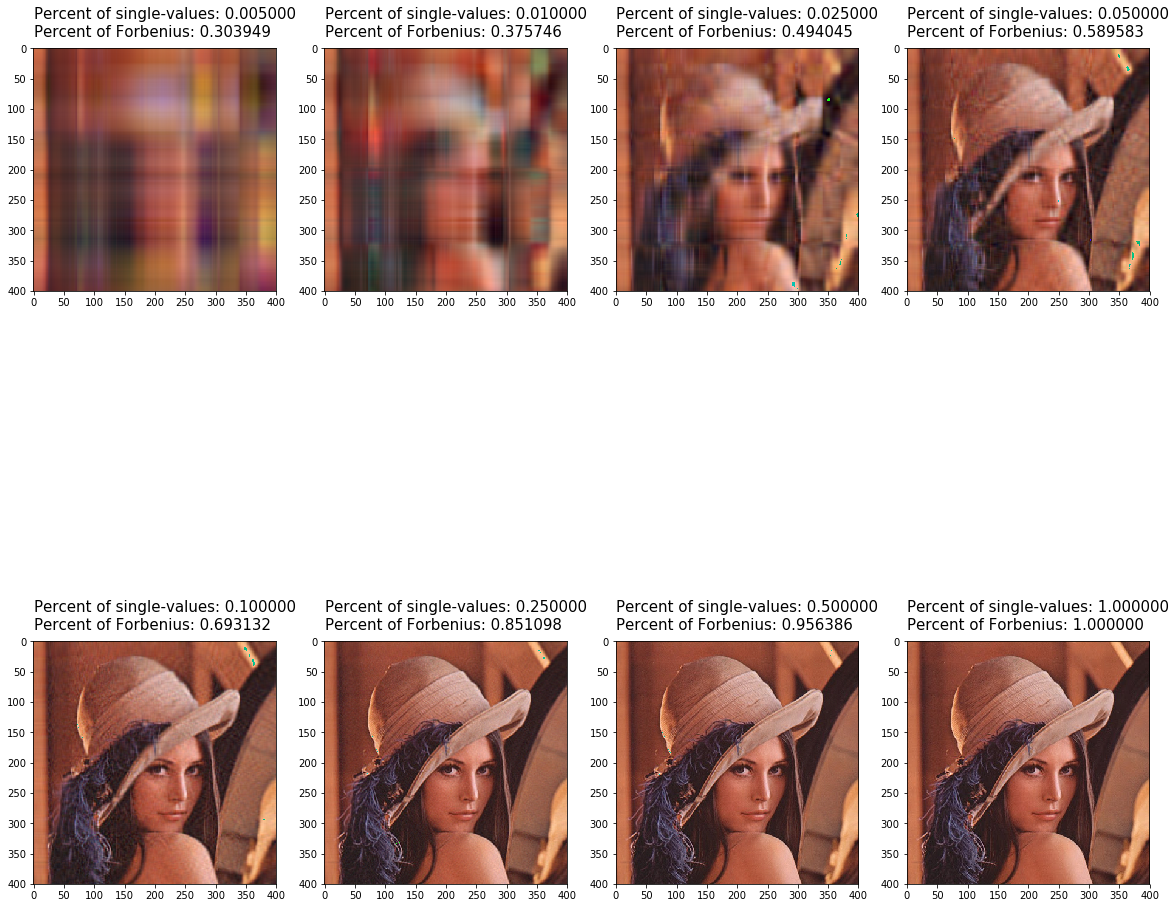

In [12]:
fig = plt.figure(figsize=(20,20))
for i, perc in enumerate(percs):
    # Check how much of variance was maintained
    k = int(perc * len(s_r))
    perc_forbenius = sum(s_r[:k] + s_g[:k] + s_b[:k])/sum(s_r + s_g + s_b)
    text = "Percent of single-values: %f\nPercent of Forbenius: %f" % (perc, perc_forbenius)
    
    # Reconstruct image
    photo_file_reconstructed = reconstruct_photo(U_r, s_r, V_r,
                                                 U_g, s_g, V_g,
                                                 U_b, s_b, V_b,
                                                 perc)

    # Show result
    ax = fig.add_subplot(2,4,i+1)
    ax.text(0, -20, text, fontsize=15)
    ax.imshow(np.asarray(photo_file_reconstructed))
    photo_file_reconstructed.save("../datasets/photo_compression=%.3f_forbenius=%.3f.jpg" % (perc, perc_forbenius))